In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from math import log

In [21]:
def read_graph(file_path, type='undirected'):
    with open(file_path, 'r') as file:
        n = int(file.readline().strip().split(" ")[1])
        for line in file:
            if line[0] == '*':
                break
        if type == 'undirected':
            G = [[] for _ in range(n)]
            for line in file:
                l = line.strip().split(" ")
                i = int(l[0])-1
                j = int(l[1])-1
                G[i].append(j) # from to - i is a predecessors of j
                G[j].append(i) # to from - j is a successor of i

        elif type == 'directed':
            G = [([], []) for _ in range(n)]
            for line in file:
                l = line.strip().split(" ")
                i = int(l[0])-1
                j = int(l[1])-1
                G[i][1].append(j)
                G[j][0].append(i)

    return G

## 3. Random node selection

In [27]:
G = read_graph('karate_club.net')

In [38]:
def random_node(G):
    node_idx = random.randint(0, len(G)-1)
    neighbour_idx = random.randint(0, len(G[node_idx])-1)
    return G[node_idx][neighbour_idx]
random_node(G)

27

## Problem 4: Weak & Strong connectivity

In [9]:
def DFS(G, i, visited, direction, stack):
    visited.add(i)
    for neighbour in G[i][direction]:
        if neighbour not in visited:
            DFS(G, neighbour, visited, direction, stack)
    stack.append(i)

def find_scc(G):
    visited = set()
    stack = []
    for node in range(len(G)): # visit every node
        if node not in visited: # if it wasn't visited yet
            DFS(G, node, visited, 0, stack)
        #print(len(stack), len(visited))
    visited.clear()
    sccs = []
    #print(stack)

    while stack:
        node = stack.pop()
        if node not in visited:
            #print(visited)
            scc_stack = []
            DFS(G, node, visited, 1, scc_stack)
            sccs.append(scc_stack)
            visited.update(scc_stack)
    
    return sccs

G = read_graph('enron.net', 'directed')
sccs = find_scc(G)

len(sccs), len(max(sccs, key=lambda lst: len(lst)))

In [10]:
G = read_graph('enron.net', 'directed')
sccs = find_scc(G)

len(sccs), len(max(sccs, key=lambda lst: len(lst)))

(78058, 9164)

In [60]:
G = nx.DiGraph(nx.read_pajek('enron.net'))
components = nx.strongly_connected_components(G)

largest_component = max(components, key=len)
largest_component_size = len(largest_component)
nx.number_strongly_connected_components(G), largest_component_size

(78058, 9164)

## 5. Is Java software scale-free?

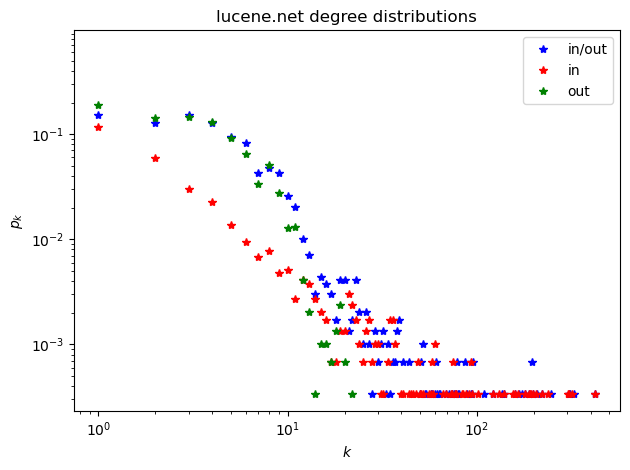

In [20]:
def plot(G, ax, c, type=0):
    nk = {}
    if type == 0: # in/out degree
        for _, k in G.degree():
            if k not in nk:
                nk[k] = 0
            nk[k] += 1
    elif type == 1:
        for _, k in G.in_degree(): # change this to only in degrees
            if k not in nk:
                nk[k] = 0
            nk[k] += 1
    elif type == 2:
        for _, k in G.out_degree(): # change this to only out degrees
            if k not in nk:
                nk[k] = 0
            nk[k] += 1

    ks = sorted(nk.keys())

    ax.loglog(ks, [nk[k] / len(G) for k in ks], '*', color=c)
    ax.set_xlabel('$k$')

G = nx.DiGraph(nx.read_pajek('lucene.net'), name="lucene.net")

fig, ax = plt.subplots(1, 1, tight_layout=True)

plot(G, ax, 'b', 0)
plot(G, ax, 'r', 1)
plot(G, ax, 'g', 2)
ax.set_title("lucene.net degree distributions")
ax.set_ylabel('$p_k$')
ax.legend(['in/out', 'in', 'out'])
plt.show()

Text(0.5, 1.0, '$\\gamma$ at different degree cut offs')

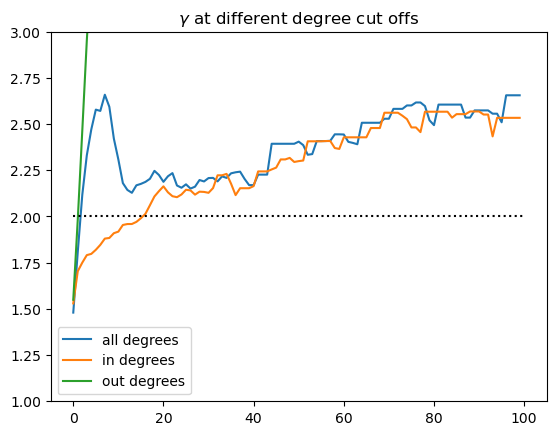

In [19]:
def calc_gamma(G: nx.DiGraph, cut_off: int, type=0):
    if type == 1:
        degrees = [k for _, k in G.in_degree() if k > cut_off] 
    elif type == 2:
        degrees = [k for _, k in G.out_degree() if k > cut_off] 
    else:
        degrees = [k for _, k in G.degree() if k > cut_off]
    if degrees:
        k_min = min(degrees)
        n_dot = len(degrees)
    else:
        return float('inf')
    #print(k_min)
    return 1+n_dot*sum([log(ki/(k_min - 1/2))*(ki >= k_min) for ki in degrees])**(-1)

plt.plot([calc_gamma(G, i) for i in range(100)])
plt.plot([calc_gamma(G, i, 1) for i in range(100)])
plt.plot([calc_gamma(G, i, 2) for i in range(100)])
plt.plot([0, 100], [2, 2], linestyle='dotted', c='black')
plt.ylim([1, 3])
plt.legend(["all degrees", "in degrees", "out degrees"])
plt.title("$\gamma$ at different degree cut offs")

In [13]:
# min degree = 5 !! 
print("in/out degree: ", calc_gamma(G, 4))
print("in degree: ", calc_gamma(G, 4, 1))
print("out degree: ", calc_gamma(G, 4, 2))

in/out degree:  2.471356639442119
in degree:  1.7976323613898262
out degree:  3.370638205209164


## Problem 6: Five networks problem

- Flickr social affiliation network
- IMDb actors collaboration network
- Small part of a university Web graph
- Sample of computer science citation network
- Realization of the Erd ̈os-R ́enyi random graph

In [43]:
networks = ['network_1.adj', 'network_2.adj', 'network_3.adj', 'network_4.adj', 'network_5.adj']
for net_name in networks:
    with open(net_name, 'r') as file:
        file.readline()
        info = file.readline().strip().split(" ")
        n = int(info[1].replace(",", ""))
        m = int(info[4].replace(",", ""))
        file.readline()
        file.readline()

        type = 'edges'
        mm = 0 
        if type == 'edges':
            G = [[] for _ in range(n)]
            for line in file:
                l = line.strip().split(" ")
                i = int(l[0])-1
                j = int(l[1])-1
                G[i].append(j) # from to - i is a predecessors of j
                G[j].append(i) # to from - j is a successor of i
                mm += 1

        degrees = [len(neigh) for neigh in G]

        print("Network name\t", net_name)
        print("Number of nodes\t", n)
        print("Number of edges\t", m)
        print("Avarage degree\t", (2*m)/n)
        print("Density\t\t", (2*m/(n*(n-1))))
        print("Max degree\t", max(degrees), sorted(degrees, reverse=True)[:5])
        print("Pendant nodes\t", degrees.count(1), degrees.count(1)/n) 

        print("")

Network name	 network_1.adj
Number of nodes	 291934
Number of edges	 1399248
Avarage degree	 9.586057122500291
Density		 3.2836497150032e-05
Max degree	 10721 [10721, 7634, 7026, 4319, 4283]
Pendant nodes	 135333 0.46357395849746863

Network name	 network_3.adj
Number of nodes	 94093
Number of edges	 766258
Avarage degree	 16.28724772299746
Density		 0.00017309917658246674
Max degree	 5311 [5311, 3266, 3173, 2927, 2775]
Pendant nodes	 27715 0.2945490100219995

Network name	 network_4.adj
Number of nodes	 202275
Number of edges	 510180
Avarage degree	 5.044419725621061
Density		 2.4938547344794984e-05
Max degree	 2803 [2803, 2016, 735, 497, 493]
Pendant nodes	 101276 0.500684711407737

Network name	 network_5.adj
Number of nodes	 83159
Number of edges	 5510251
Avarage degree	 132.52326266549622
Density		 0.0015936321540380508
Max degree	 3257 [3257, 3178, 3127, 3097, 2984]
Pendant nodes	 12 0.0001443018795319809



In [3]:
def read_graph(name):
    G = nx.Graph(nx.read_edgelist(name))
    #G = nx.convert_node_labels_to_integers(G, label_attribute="label")
    G.name = name
    return G
for net in networks:
    G = read_graph('./'+net)
    print(nx.average_clustering(nx.Graph(G)))

In [4]:
G = read_graph('./'+'network_2.adj') #0.253 for net1, 0 for net3
print(nx.average_clustering(nx.Graph(G)))

3.437215379691078e-05


In [66]:
for net in networks:
    G = read_graph('./'+net)
    print(nx.average_clustering(nx.Graph(G)))

0.25394067066706016
0.0
0.07978452668214911


Comments:
- Looking at components is usless as they were filtered to only be the biggest component (so always 1, 1)
- network 5 has abnormally big average degree
- density is about similar, no distinction
- look what graphs are directional, there are supposed to be 2 (web and some other)
- there are no isolated nodes -> obv since theres only a full component
- there are 2 graphs (net_1-46% and net_4-50%) with a large amount of pendant nodes -> sus for web and citation

Sus:
- Net_1 -> citation - larger amount of degrees + higher max degrees (and more of them)
- Net_2 -> Realization of the Erd ̈os-R ́enyi random graph, because the max. degree is really small
- Net_3 -> imdb or flickr - difference maker is avg degree, check clustering coef, think this is flicker
- Net_4 -> small part of university web - lower amount of degrees and lower max degrees compared to net 1
- Net_5 -> imdb or flicker - difference maker is avg degree, check clustering coef, think this is imdb - smaller but more connected network (nodes, density, avg degree)